# Mid-term Report

## INTRODUCTION

At LHC proton collisions lead to huge data generation in the order of exabytes. Various experiments (namely CMS, ATLAS, LHCb and ALICE) use the data for analysis. Currently it is not possible to  store the entire data on the system and hence there is real time analysis of data to identify the important data and store it for further analysis by the Physicists.

CMS(Compact Muon Solenoid) is aimed at detecting the new phenomenon that the LHC might reveal. For this various chambers are designed to effictively track and detect them. All detectors are subject to faults and anomalies; so is the case with the Drift Tubes of the CMS detector. In this project we aims at using anomaly detection techniques, based on Machine Learning, to perform tests on incoming data to assess their quality. The technology will then be applied to real workflows, related to the online DQM system of the CMS experiment

<!--- 
![alt text](LS_normalizeds-Copy1.jpg "img test")-->


## What is an an anomaly? and current monitoring methods

As the shower of particles move through various layers of the detector; they generate signals. It is these signals which are studied. First for quality by computational methods and later the filtered data goes to the physicists for further analysis. These detector channels can suffer from various faults like non-functional chambers or other disturbances as a result the data quality system suffers. Currently, we have experts who set the thresholds for data quality values and if the fault levels cross those set threshold; the operator, monitoring the given system sounds an alert else the data goes through the normal stages of data filtering and storage. This is not expected to be very effecient as the thresholds are static and manually biassed. 


## Representing Chambers
Each chamber has three superlayers; who further consist of four layers which collect data. For analysis of data patterns and outliers we will be considering golden runs(certified by experts to be error free). We looked at two mathematical measures for the representations of the chambers.

1. Mean:
   The mean did not perform well since it was sensitive to outliers and hence even a few outliers made the representative values very skewed from the more representative block hence we decided to use a different mathematical measure.
    
2. Median:
   Median is comparitively more robust to outliers and not heavily influence with a few outlier patterns. Hence we decided to keep median as a represenative of the skewed data of the chambers.

## Deciding The Variables for Plots
The CMS detector is symmterical in nature. It has 5 wheels (-2,-1,0,1,2). Each wheel has 14 sectors and each sector has 4 stations other than sector 13, 14 which only has one station i.e; station 4.

Since the wheel placement is responsible for distance from the point of collision the stations belonging to each wheel will have difference in number of hits(i.e. number of particles that crossed the given chamber). We clubbed data from the same stations (irrespective of the sector) for each wheel [i.e. all station1's of wheel 0, station1's of wheel 1 and so on]. The graphs were plotted for each station separately with wheel_number vs number of hits at that station.

The pattern of data from the runs are represented here[Run Patterns](../Run Patterns.ipynb)


## Data Normalization
Once the chamber representation was chosen, we normalized the data points for standardised comparisons.The following normalization techniques were used:

1. Normalization by Lumisections
2. Min-Max Normalization
3. Robust Scaling
4. Z-score normalization
5. Median MAD normalization
6. Tanh normalization

For inline code we will be plotting the following three golden runs:
1. Run 273158 -- 1278 Lumisections
2. Run 297219 -- 2636 Lumisections
3. Run 296786 -- 750 Lumisections


# Import Libraries


In [1]:
import os
import ast
import numpy
import matplotlib as plt
import pylab as plt
import copy
import itertools
import collections
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy import stats
import statistics
from astropy.stats import median_absolute_deviation

In [2]:
import matplotlib.pyplot as plt #plotting
#import matplotlib.gridspec as gridspec
%matplotlib inline

# Set global lists

In [3]:
mark_list=['ro','bo','go']

wheel_list2=[[0]*12,[1]*12,[2]*12,[-1]*12,[-2]*12]


#fig, axes = plt.subplots(2, 2)

# Normalization by Lumisection

Each run is of different lumisections and the data in the system is refreshed after every 400 lumisections hence each run is normalized using modulo factor of 400. (lumisection % 400)

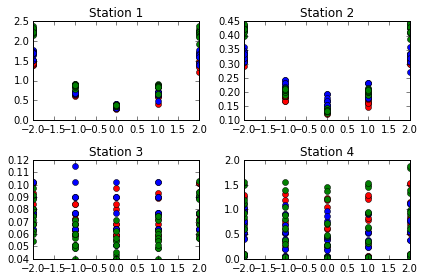

In [4]:
j=0


fig, axes = plt.subplots(2, 2)
run_files={'/home/cis505/cern-test/med_273158':1278,'/home/cis505/cern-test/med_296786':750,'/home/cis505/cern-test/med_297219':2636}
for k,v in run_files.iteritems():
    with open(k, 'r') as f:
        mylist = ast.literal_eval(f.read())
        normalization_factor=v%400
        newlist=[[[each_number/float(normalization_factor) for each_number in list2 ] for list2 in list1]for list1 in mylist]     #print newlist
        temp_list1=[] #station1 list i.e. all station1's values for each wheel(0,1,2,-1,-2) -- order is important
        temp_list2=[]
        temp_list3=[]
        temp_list4=[]
        
        for each_wheel in newlist:
            temp_list1.append(each_wheel[0])
            temp_list2.append(each_wheel[1])
            temp_list3.append(each_wheel[2])
            temp_list4.append(each_wheel[3])
            
        temp_list1 = numpy.array(temp_list1)
        temp_list2 = numpy.array(temp_list2)
        temp_list3 = numpy.array(temp_list3)
        temp_list4 = numpy.array(temp_list4)
        wheel_list2=numpy.array(wheel_list2)
        
        
        for i in range(0,5):
            #plt.plot(wheel_list2[i,:],temp_list1[i,:],mark_list[j])
            axes[0, 0].plot(wheel_list2[i,:],temp_list1[i,:],mark_list[j])
            axes[0,0].title.set_text('Station 1')
            #fig.subplots_adjust(bottom=0.2, wspace= 0.3,hspace =0.3, top =0.3)
            axes[0, 1].plot(wheel_list2[i,:],temp_list2[i,:],mark_list[j])
            axes[0,1].title.set_text('Station 2')
            axes[1, 0].plot(wheel_list2[i,:],temp_list3[i,:],mark_list[j])
            axes[1,0].title.set_text('Station 3')
            axes[1, 1].plot(wheel_list2[i,:],temp_list4[i,:],mark_list[j])
            axes[1,1].title.set_text('Station 4')
        
        f.close()
        j=j+1;
plt.tight_layout()
plt.show()

# Min-Max Normalization

In this approach, the data is scaled to a fixed range between [0,1]. This approach results in smaller standard deviations, which can suppress the effect of outliers.
A Min-Max normalization is done using the following equation:

$$X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}}$$


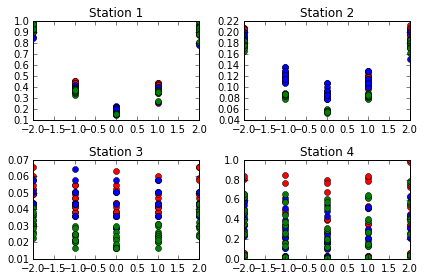

In [5]:
j=0


fig, axes = plt.subplots(2, 2)
run_files={'/home/cis505/cern-test/med_273158':1278,'/home/cis505/cern-test/med_296786':750,'/home/cis505/cern-test/med_297219':2636}
for k,v in run_files.iteritems():
    with open(k, 'r') as f:
        mylist=[]
        mylist = ast.literal_eval(f.read())
        
        
        #copy the run;flatten the entire copied run, get min,max
        mylist2=copy.deepcopy(mylist)
        flat_list = [item for sublist1 in mylist2 for sublist2 in sublist1 for item in sublist2]
        min_factor=min(flat_list)
        max_factor=max(flat_list)
        
        #normalised list
        newlist=[[[(each_number-min_factor)/float(max_factor-min_factor) for each_number in list2 ] for list2 in list1]for list1 in mylist]
        #print newlist
        temp_list1=[] #station1 list i.e. all station1's values for each wheel(0,1,2,-1,-2) -- order is important
        temp_list2=[]
        temp_list3=[]
        temp_list4=[]
        
        for each_wheel in newlist:
            temp_list1.append(each_wheel[0])
            temp_list2.append(each_wheel[1])
            temp_list3.append(each_wheel[2])
            temp_list4.append(each_wheel[3])
            
        temp_list1 = numpy.array(temp_list1)
        temp_list2 = numpy.array(temp_list2)
        temp_list3 = numpy.array(temp_list3)
        temp_list4 = numpy.array(temp_list4)
        wheel_list2=numpy.array(wheel_list2)
        
        '''fig, axes = plt.subplots(2, 2)'''
        
        for i in range(0,5):
            #plt.plot(wheel_list2[i,:],temp_list1[i,:],mark_list[j])
            axes[0, 0].plot(wheel_list2[i,:],temp_list1[i,:],mark_list[j])
            axes[0,0].title.set_text('Station 1')
            axes[0, 1].plot(wheel_list2[i,:],temp_list2[i,:],mark_list[j])
            axes[0,1].title.set_text('Station 2')
            axes[1, 0].plot(wheel_list2[i,:],temp_list3[i,:],mark_list[j])
            axes[1,0].title.set_text('Station 3')
            axes[1, 1].plot(wheel_list2[i,:],temp_list4[i,:],mark_list[j])
            axes[1,1].title.set_text('Station 4')
        
        f.close()
        j=j+1;
plt.tight_layout()
plt.show()

# Robust Normalization
This Scaler removes the median and scales the data according to the quantile range (In scikit learn it defaults to Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

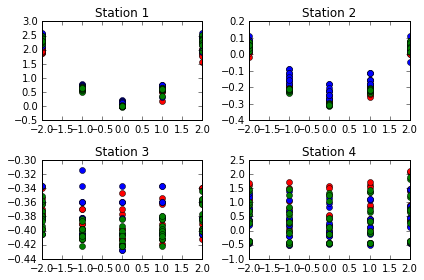

In [6]:
import warnings
warnings.filterwarnings('ignore')

j=0

fig, axes = plt.subplots(2, 2)
run_files={'/home/cis505/cern-test/med_273158':1278,'/home/cis505/cern-test/med_296786':750,'/home/cis505/cern-test/med_297219':2636}
for k,v in run_files.iteritems():
    with open(k, 'r') as f:
        mylist=[]
        mylist = ast.literal_eval(f.read())

        #copy the run;flatten the entire copied run, robust scale the run
        mylist2=copy.deepcopy(mylist)
        flat_list = [item for sublist1 in mylist2 for sublist2 in sublist1 for item in sublist2]
        array_flat_list=numpy.array(flat_list)


        robust_scaler = RobustScaler()
        robust_array=robust_scaler.fit_transform(array_flat_list)

        robust_list=robust_array.tolist()

        #re-nest the robust scaled list
        global_var=0;
        var2=0
        global_list=[]
        
        for var in range(0,5):
            wheel_list=[]
            while global_var < 48:
                wheel_list.append(robust_list[var2:var2+12])
                global_var=global_var+12
                var2=var2+12
            global_list.append(wheel_list)
            global_var=0
            
      
        temp_list1=[] #station1 list i.e. all station1's values for each wheel(0,1,2,-1,-2) -- order is important
        temp_list2=[]
        temp_list3=[]
        temp_list4=[]
        
        for each_wheel in global_list:
            temp_list1.append(each_wheel[0])
            temp_list2.append(each_wheel[1])
            temp_list3.append(each_wheel[2])
            temp_list4.append(each_wheel[3])
            
        temp_list1 = numpy.array(temp_list1)
        temp_list2 = numpy.array(temp_list2)
        temp_list3 = numpy.array(temp_list3)
        temp_list4 = numpy.array(temp_list4)
        wheel_list2=numpy.array(wheel_list2)
                
        for i in range(0,5):
            axes[0, 0].plot(wheel_list2[i,:],temp_list1[i,:],mark_list[j])
            axes[0,0].title.set_text('Station 1')
            axes[0, 1].plot(wheel_list2[i,:],temp_list2[i,:],mark_list[j])
            axes[0,1].title.set_text('Station 2')
            axes[1, 0].plot(wheel_list2[i,:],temp_list3[i,:],mark_list[j])
            axes[1,0].title.set_text('Station 3')
            axes[1, 1].plot(wheel_list2[i,:],temp_list4[i,:],mark_list[j])
            axes[1,1].title.set_text('Station 4')
        f.close()
        j=j+1
        
plt.tight_layout()
plt.show()

## Z score normalization
The z score represents the distance between the raw value and the population mean in units of the standard deviation. z is negative when the raw score is below the mean, positive when above.
$$ z={x-\mu \over \sigma }$$
z normalization allows values that are too extreme to keep some extremeness left after normalization. This might prove to be useful to detect outliers.

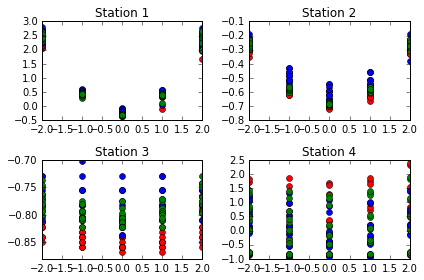

In [7]:
j=0


fig, axes = plt.subplots(2, 2)
run_files={'/home/cis505/cern-test/med_273158':1278,'/home/cis505/cern-test/med_296786':750,'/home/cis505/cern-test/med_297219':2636}
for k,v in run_files.iteritems():
    with open(k, 'r') as f:
        mylist=[]
        mylist = ast.literal_eval(f.read())
        
        #copy and flatten_list
        mylist2=copy.deepcopy(mylist)
        flat_list = [item for sublist1 in mylist2 for sublist2 in sublist1 for item in sublist2]
        array_flat_list=numpy.array(flat_list)
        
        #find z score
        z_scored_array=stats.zscore(array_flat_list)
        z_score_list=z_scored_array.tolist()
        
        #re-nest list
        global_var=0;
        var2=0
        global_list=[]
        
        for var in range(0,5):
            wheel_list=[]
            while global_var < 48:
                wheel_list.append(z_score_list[var2:var2+12])
                global_var=global_var+12
                var2=var2+12
            global_list.append(wheel_list)
            global_var=0

        temp_list1=[] #station1 list i.e. all station1's values for each wheel(0,1,2,-1,-2) -- order is important
        temp_list2=[]
        temp_list3=[]
        temp_list4=[]
        
        for each_wheel in global_list:
            temp_list1.append(each_wheel[0])
            temp_list2.append(each_wheel[1])
            temp_list3.append(each_wheel[2])
            temp_list4.append(each_wheel[3])
            
        temp_list1 = numpy.array(temp_list1)
        temp_list2 = numpy.array(temp_list2)
        temp_list3 = numpy.array(temp_list3)
        temp_list4 = numpy.array(temp_list4)
        wheel_list2=numpy.array(wheel_list2)
        

        for i in range(0,5):
            axes[0, 0].plot(wheel_list2[i,:],temp_list1[i,:],mark_list[j])
            axes[0,0].title.set_text('Station 1')
            axes[0, 1].plot(wheel_list2[i,:],temp_list2[i,:],mark_list[j])
            axes[0,1].title.set_text('Station 2')
            axes[1, 0].plot(wheel_list2[i,:],temp_list3[i,:],mark_list[j])
            axes[1,0].title.set_text('Station 3')
            axes[1, 1].plot(wheel_list2[i,:],temp_list4[i,:],mark_list[j])
            axes[1,1].title.set_text('Station 4')
        f.close()
        j=j+1
        
plt.tight_layout()
plt.show()

<!---2 types of standardization z-score and min-max scaling.

z-score will normalize each column into having mean of zero and standardization of ones, 
which will be good choice if we are using some sort of output functions like tanh, 
that outputs values on both sides of zero. 
Besides, this will leave values that are too extreme to still keep some extremeness
left after normalization (e.g. to have more than 2 standard deviations away).
This might be useful to detect outliers in this case.

The second min-max approach will ensure all values to be within 0 ~ 1. 
All positive. This is the default approach if we are using sigmoid as 
our output activation.

Just to recap the differences between sigmoid and tanh below 
(sigmoid will squash the values into range between (0, 1); 
 whereas tanh, or hyperbolic tangent, squash them into (-1, 1)):
    
![alt text](https://vanishingcodes.files.wordpress.com/2017/06/tanh-and-sigmoid.png "Logo Title Text 1")
   

    
Based on experiments, I found tanh to perform better than sigmoid, 
when using together with z-score normalization.
Therefore, I chose tanh followed by z-score. -->

## Median and MAD normalization
MAD is median absolute deviation, it is robust to outliers than standard deviation. It is calculated using:
$${MAD} =\operatorname {median} \left(\ \left|X_{i}-\operatorname {median} (X)\right|\ \right)$$

Data is normalized using the following 
$$ normalized score = {x-median \over MAD }$$

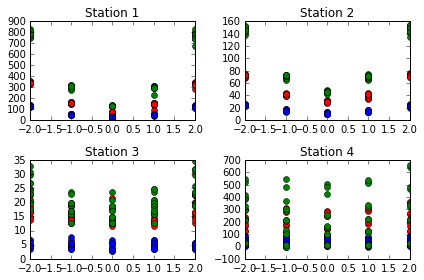

In [8]:
j=0


fig, axes = plt.subplots(2, 2)
run_files={'/home/cis505/cern-test/med_273158':1278,'/home/cis505/cern-test/med_296786':750,'/home/cis505/cern-test/med_297219':2636}
for k,v in run_files.iteritems():
    with open(k, 'r') as f:
        mylist=[]
        mylist = ast.literal_eval(f.read())
        
        #copy and flatten_list
        #mylist2=copy.deepcopy(mylist)
        flat_list = [item for sublist1 in mylist for sublist2 in sublist1 for item in sublist2]
        array_flat_list=numpy.array(flat_list)
        
        #find mad 
        median=statistics.median(flat_list)
        mad = median_absolute_deviation(array_flat_list)

        mylist2=[]
        for each_element in flat_list:
            value=each_element-median/float(mad)
            mylist2.append(value)
            
        
        #re-nest list
        global_var=0;
        var2=0
        global_list=[]
        
        for var in range(0,5):
            wheel_list=[]
            while global_var < 48:
                wheel_list.append(mylist2[var2:var2+12])
                global_var=global_var+12
                var2=var2+12
            global_list.append(wheel_list)
            global_var=0
            
        
        temp_list1=[] #station1 list i.e. all station1's values for each wheel(0,1,2,-1,-2) -- order is important
        temp_list2=[]
        temp_list3=[]
        temp_list4=[]
        
        for each_wheel in global_list:
            temp_list1.append(each_wheel[0])
            temp_list2.append(each_wheel[1])
            temp_list3.append(each_wheel[2])
            temp_list4.append(each_wheel[3])
            
        temp_list1 = numpy.array(temp_list1)
        temp_list2 = numpy.array(temp_list2)
        temp_list3 = numpy.array(temp_list3)
        temp_list4 = numpy.array(temp_list4)
        wheel_list2=numpy.array(wheel_list2)
        
        for i in range(0,5):
            axes[0, 0].plot(wheel_list2[i,:],temp_list1[i,:],mark_list[j])
            axes[0,0].title.set_text('Station 1')
            axes[0, 1].plot(wheel_list2[i,:],temp_list2[i,:],mark_list[j])
            axes[0,1].title.set_text('Station 2')
            axes[1, 0].plot(wheel_list2[i,:],temp_list3[i,:],mark_list[j])
            axes[1,0].title.set_text('Station 3')
            axes[1, 1].plot(wheel_list2[i,:],temp_list4[i,:],mark_list[j])
            axes[1,1].title.set_text('Station 4')
        f.close()
        j=j+1
        
plt.tight_layout()
plt.show()

## Tanh Normalization
The tanh-estimators introduced by Hampel et al. are robust and highly efficient. The normalization is given by:
$$ 0.5 * (tanh(0.01 (\frac {x-\mu}{\sigma}))+1)$$
where $$\mu, \sigma$$ are the mean and standard deviation estimates, respectively, of the genuine score distribution as given by Hampel estimators


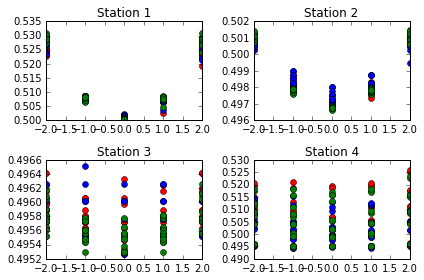

In [9]:
j=0


fig, axes = plt.subplots(2, 2)
run_files={'/home/cis505/cern-test/med_273158':[23.043,20.146],'/home/cis505/cern-test/med_296786':[122.02,114.94],'/home/cis505/cern-test/med_297219':[65.461,57.802]}
for k,v in run_files.iteritems():
    with open(k, 'r') as f:
        mylist=[]
        mylist = ast.literal_eval(f.read())
        
        #copy and flatten_list
        #mylist2=copy.deepcopy(mylist)
        flat_list = [item for sublist1 in mylist for sublist2 in sublist1 for item in sublist2]
        
        mylist2=[]
        for each_element in flat_list:
            value=(each_element-v[0])/float(v[1])
            value2=0.5*(numpy.tanh(0.01*value)+1)
            mylist2.append(value2)
                
        
        #re-nest list
        global_var=0;
        var2=0
        global_list=[]
        
        for var in range(0,5):
            wheel_list=[]
            while global_var < 48:
                wheel_list.append(mylist2[var2:var2+12])
                global_var=global_var+12
                var2=var2+12
            global_list.append(wheel_list)
            global_var=0
            
        
        temp_list1=[] #station1 list i.e. all station1's values for each wheel(0,1,2,-1,-2) -- order is important
        temp_list2=[]
        temp_list3=[]
        temp_list4=[]
        
        for each_wheel in global_list:
            temp_list1.append(each_wheel[0])
            temp_list2.append(each_wheel[1])
            temp_list3.append(each_wheel[2])
            temp_list4.append(each_wheel[3])
            
        temp_list1 = numpy.array(temp_list1)
        temp_list2 = numpy.array(temp_list2)
        temp_list3 = numpy.array(temp_list3)
        temp_list4 = numpy.array(temp_list4)
        wheel_list2=numpy.array(wheel_list2)
        

        for i in range(0,5):
            axes[0, 0].plot(wheel_list2[i,:],temp_list1[i,:],mark_list[j])
            axes[0,0].title.set_text('Station 1')
            axes[0, 1].plot(wheel_list2[i,:],temp_list2[i,:],mark_list[j])
            axes[0,1].title.set_text('Station 2')
            axes[1, 0].plot(wheel_list2[i,:],temp_list3[i,:],mark_list[j])
            axes[1,0].title.set_text('Station 3')
            axes[1, 1].plot(wheel_list2[i,:],temp_list4[i,:],mark_list[j])
            axes[1,1].title.set_text('Station 4')
        f.close()
        j=j+1
        
plt.tight_layout()
plt.show()

After applying these normalization techniques we see a pattern with robust scaling [Robust image](../Med_robust.jpg) and tanh normalizations[tan-h image](../med_tanh-normalised2.jpg). These also show us the outlier positions. Few of the outlier that these statistics show are presented below. Apart from the obvious anomolous chambers the normalization plots do help in seeing a few more subtle anomolous chambers

![alt text](anomaly.png "Detected anomalies")

# Future Steps

After successfully, finding patterns in the data of each station we plan to follow uo with the following machine learning approach:
1. Apply regression algorithms: Regression Trees

Currently planning to use a 100*3 data matrix. With the feature vector being station, wheel, sector prediction being median of the chamber. With number of trees intially being 10 and depth set to 5(to avoid overfitting). Later would, explore wirh more data will try to engineer more features. 

Link to Sector analysis [Sector Analysis](../Sector Analysis.ipynb)

2. Apply LSTM, CNN models: their parameters would be decided based on the performance of regression trees.

For testing and validation; we would be looking at N cross validation methods.